<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-the-genetic-basis-of-metabolite-accumulation-and-depletion" data-toc-modified-id="Predicting-the-genetic-basis-of-metabolite-accumulation-and-depletion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicting the genetic basis of metabolite accumulation and depletion</a></span></li><li><span><a href="#Producibility-analysis" data-toc-modified-id="Producibility-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Producibility analysis</a></span><ul class="toc-item"><li><span><a href="#Function-definitions" data-toc-modified-id="Function-definitions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Function definitions</a></span><ul class="toc-item"><li><span><a href="#FBA-of-iJR904-from-cobra" data-toc-modified-id="FBA-of-iJR904-from-cobra-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>FBA of iJR904 from cobra</a></span></li><li><span><a href="#FBA-of-iJR904-from-cvx" data-toc-modified-id="FBA-of-iJR904-from-cvx-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>FBA of iJR904 from cvx</a></span></li></ul></li><li><span><a href="#Naive-implementation-of-Metabolite-producibility-applied-to-biomass-components" data-toc-modified-id="Naive-implementation-of-Metabolite-producibility-applied-to-biomass-components-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Naive implementation of Metabolite producibility applied to biomass components</a></span><ul class="toc-item"><li><span><a href="#Cobrapy-implementation" data-toc-modified-id="Cobrapy-implementation-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Cobrapy implementation</a></span></li><li><span><a href="#CVXPy-implementation" data-toc-modified-id="CVXPy-implementation-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>CVXPy implementation</a></span></li></ul></li><li><span><a href="#Dual-variable-Metabolite-Producibility-implementation" data-toc-modified-id="Dual-variable-Metabolite-Producibility-implementation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Dual variable Metabolite Producibility implementation</a></span></li><li><span><a href="#First-compute-the-wild-type-producible-and-nonproducible-metabolites" data-toc-modified-id="First-compute-the-wild-type-producible-and-nonproducible-metabolites-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>First compute the wild-type producible and nonproducible metabolites</a></span></li><li><span><a href="#Producible-and-nonproducible-metabolites-for-all-reaction-knockouts" data-toc-modified-id="Producible-and-nonproducible-metabolites-for-all-reaction-knockouts-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Producible and nonproducible metabolites for all reaction knockouts</a></span></li><li><span><a href="#Producible-and-nonproducible-metabolites-for-all-gene-knockouts-using-dual-variable-approach" data-toc-modified-id="Producible-and-nonproducible-metabolites-for-all-gene-knockouts-using-dual-variable-approach-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Producible and nonproducible metabolites for all gene knockouts using dual variable approach</a></span></li></ul></li><li><span><a href="#UDN-metabolite-mapping-to-BIGG" data-toc-modified-id="UDN-metabolite-mapping-to-BIGG-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>UDN metabolite mapping to BIGG</a></span></li><li><span><a href="#UDN-metabolite-producibilty-heatmap" data-toc-modified-id="UDN-metabolite-producibilty-heatmap-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>UDN metabolite producibilty heatmap</a></span><ul class="toc-item"><li><span><a href="#Plot.ly" data-toc-modified-id="Plot.ly-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plot.ly</a></span></li><li><span><a href="#Seaborn" data-toc-modified-id="Seaborn-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Seaborn</a></span></li></ul></li><li><span><a href="#Metabolite-producibility-report" data-toc-modified-id="Metabolite-producibility-report-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Metabolite producibility report</a></span></li></ul></div>

# Predicting the genetic basis of metabolite accumulation and depletion#

From

* Imielinski, M., Belta, C., Halasz, A., & Rubin, H. (2005). [Investigating metabolite essentiality through genome-scale analysis of Escherichia coli production capabilities](http://doi.org/10.1093/bioinformatics/bti245). Bioinformatics, 21(9), 2008–2016. 
* Imielinski, M., Klitgord, N., Belta, C., Klitgord, N., & Belta, C. (2008). [Investigating the genomic basis of metabolic robustness through in silico flux analysis](http://doi.org/10.1109/CDC.2008.4739459). In 2008 47th IEEE Conference on Decision and Control (pp. 793–798). IEEE. 

Notation: for $n,i\in{\mathbb N}$,we use $I_n$ to denote the $n\times n$ identity matrix, and $e^{n,i}\in{\mathbb R}^n$ to denote the $i$-th element of the Euclidean basis in $\mathbb R^n$. Given $m,n\in\mathbb N$, we use the notation $M=\{1,\ldots,m\}$ and $N=\{1,\ldots,n\}$.  For a set $C$, we use $|C$ to denote its cardinality. If $A\in\mathbb R^{m\times n}$ and $U\subset M$, then $A_U$ denotes the submatrix of $A$ containing the rows with indices in the set $U$. Therefore, if $x\in \mathbb R^n$, $i\in N$, and $U\subset N$, then $x_i$ and $x_U\in\mathbb R^{|U|}$ denote its $i$th component and the vector formed by taking components in set $U$, respectively.  Let $S\in\mathbb R^{m\times n}$ be the stoichiometric matrix, $x$ the set of $m$ metabolite concentrations, and $v$ the set of reaction fluxes. Then 

$$\begin{equation}
\dot{x} = Sv, v\geq 0
\end{equation}$$

$$\begin{equation}
Sv = 0, v\geq 0
\end{equation}$$

# Producibility analysis 

A metabolite $j\in M$ is called *producible* by the metabolic network (1) if the network can sustain its synthesis under the steady state and thermodynamic constraints in equation $(2)$.
To test producibility of metabolite $j$, we add a "fictitious" chemical reaction that uses metabolite $j$, and then test whether the network can produce strictly positive flux through this chemical reaction, while observing the steady state and thermodynamic constraints. Formally, this corresponds to an augmentation of the stoichiometry matrix $S$ with $e^{m,j}$ on the right, and the flux vector $v$ with $w\in\mathbb R$, $w \geq 0$ at the bottom. In other words, $w$ corresponds to the flux through the additional chemical reaction. To characterize the production capabilities of a metabolic network globally, we can add one test chemical reaction for each metabolite, and correspondingly augment the stoichiometry matrix $S$ with $I_m$ on the right and $v$ with a $w \in \mathbb R^n$, $w \geq 0$
at the bottom. We will denote the augmented matrix by
$\bar{S} \in\mathbb R^{m\times(n+m)}$ and the augmented vector by $\bar{v}\in\mathbb R^{n+m}$.
In this framework, producibility of metabolite $j\in M$ can be decided by solving the following LP:

$$\begin{equation}
\begin{array}{ll}
\underset{\bar{v}\in\mathbb R^{n+m}}{\max} & \bar{v}_{j+n}  \\
& \bar{S}\bar{v} = 0 \\
& \bar{v} \geq 0 \\
& \bar{v}_{j+n}\leq\alpha \\
\end{array}\end{equation}$$

where $\alpha$ is an arbitrary constant that keeps the problem bounded. If the optimal value of $(3)$ is zero, then metabolite $j$ is not producible.  Othewise metabolite $j$ is (potentially) producible.  To test the producibility of a metabolite under metabolic gene knockouts, one can simply add the equality constraints $\bar{v}_J = 0$ to (3) where $J$ is the set of reactions knocked out by the gene knockouts.

In order to asses the robustness of metabolism, we are interested in studying the producibility of each metabolite in a metabolic network under various metabolic gene knock- outs. With the framework we presented so far, this would imply solving a number of LP equal to the number of gene perturbations multiplied the number of metabolites. Since the size of each LP is in the order of thousands, and the number of gene perturbations is in the order of millions, such an approach would be infeasible computationally. In this paper, we propose the reduce the amount of computation by using both problem (3) and its dual, whose solutions are available simultaneously if an interior-point-type optimization method (such as the one implemented in SeDuMi [1]) is used. In the following we show that, in most of the cases, it is enough to solve one LP to decide the producibility of all metabolites. 

First, whenever we find a solution $\bar{v}$ of (3), we search it for all components for which $\bar{v}_{n+i}> 0$. If such a component is found, then we label metabolite $i$ as producible. Second, the dual of (3) is given by 

$$\begin{equation}
\begin{array}{ll}
\underset{g\in\mathbb R^m,s\in\mathbb R}{\min} & \alpha s\\
\text{subject to} & \bar{S}^Tg + se^{n+m,j+n}\leq e^{n+m,j+n} \\
& s\geq 0 \\
\end{array}
\end{equation}$$

where $s$ is a "slack" variable.  It is easy to see that the primal problem $(3)$ can only produce two optimal values of its objective: $0$ and $\alpha$.   Therefore the optimal value of the dual problem $(4)$ can only be $0$ or $\alpha$, which implies that every dual solution $g\in\mathbb R^m$ satisfies $\bar{S}^Tg\geq 0$. In our previous work, by employing a simple variation of Farkas' Lemma, we showed that $g$ satisfying 

$$\left\{\begin{array}{c}
\left(\bar{S}^Tg\right)_{n+i} >0 \\
\bar{S}^Tg \geq  0 \\
\end{array}\right\}$$

certifies the infeasibility of the set 

$$\left\{
\begin{array}{cc}
\bar{S}\bar{v} = 0, \\
\bar{v} = 0,  \\
\bar{v}_{n+i} > 0 \\
\end{array}
\right\}$$

Therefore, by a simple inspection fo the solution $g$ of the dual problem $(4)$, we can classify all metabolites $i$ for which $\left(\bar{S}^Tg\right)_{n+i} > 0$ as "non-producible".

## Function definitions

In [27]:
import cobra, libsbml, escher,numpy as np, pandas as pd
import scipy.sparse
import cvxpy as cvx
import cobra
import pandas as pd
from cobra.flux_analysis import single_gene_deletion

def makeS_and_rxn_bounds( model ):
    rxns = [rxn.id for rxn in model.reactions]
    mets = [met.name for met in model.metabolites] 
    S = cobra.util.create_stoichiometric_matrix(model, 
                                                array_type='DataFrame') 
                
    S.columns.name = 'reactions'
    S.index.name = 'metabolites'
    lower_bounds = pd.Series([rxn.lower_bound for rxn in model.reactions] , index=rxns)
    upper_bounds = pd.Series([rxn.upper_bound for rxn in model.reactions] , index= rxns)
    
    return S, lower_bounds, upper_bounds
def makeSbar( S ):
    m,n = S.shape
    I = np.eye(m)
    return scipy.sparse.lil_matrix(np.c_[S.value.toarray(), I])

def makeSbarAndE( S ):
    m,n = S.shape
    I = np.eye(m)
    Sbar = np.c_[S.value.toarray(), I]
    E = [np.squeeze(Sbar[j,:].T) for j in range(m)]
    return scipy.sparse.lil_matrix(Sbar), E

def makeBarBounds( m,lower_bounds, upper_bounds, alpha ):
    lower_bound_bar = np.r_[lower_bounds, np.zeros(m)]
    upper_bound_bar = np.r_[upper_bounds, np.ones(m)*alpha]
    return lower_bound_bar, upper_bound_bar
                                          
def augment_model_with_sink_rxns( model, metabolites ):
    new_model = model.copy()
    sink_rxns = dict([(metabolite.id, 
                       cobra.Reaction('Sink_{}'.format(metabolite.id)))
                             for metabolite in metabolites])
    new_model.add_reactions( sink_rxns.values() )
    for metabolite in metabolites:
        sink_rxns[metabolite.id].reaction = '{} -->'.format(metabolite.id)
    return new_model
def apply_rich_media( model ):
    for exchange in cobra.medium.boundary_types.find_boundary_types(model,'exchange'):
            exchange.lower_bound= -10
    return model

### FBA of iJR904 from cobra ###

In [3]:
ijr904 = cobra.io.load_json_model('iJR904.json')
solution = ijr904.optimize()
fluxes = pd.DataFrame({'Fluxes':solution.x_dict}, index=[r.id for r in ijr904.reactions])
fluxes.loc['BIOMASS_Ecoli']

Fluxes    0.921948
Name: BIOMASS_Ecoli, dtype: float64

### FBA of iJR904 from cvx

In [3]:
biomass_rxn = 'BIOMASS_Ecoli'

Sdf, lower_series, upper_series = makeS_and_rxn_bounds( ijr904 )
rxns = [rxn for rxn in Sdf.columns]
mets = [met for met in Sdf.index]
m,n = Sdf.shape
biomass = Sdf.columns.get_loc(biomass_rxn)
S = cvx.Constant(cobra.util.create_stoichiometric_matrix(ijr904, array_type='lil'))
v = cvx.Variable(n)

objective = cvx.Maximize(v[biomass] )
lower_bounds, upper_bounds = lower_series.values, upper_series.values

constraints = [S*v == 0,
               lower_bounds <= v,
               v <= upper_bounds]

problem = cvx.Problem(objective, constraints)
problem.solve(verbose=True)
cvx_fluxes = pd.DataFrame({'Flux':np.squeeze(np.asarray(v.value))}, index=rxns)
cvx_fluxes

-----------------------------------------------------------------
           OSQP v0.4.1  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2018
-----------------------------------------------------------------
problem:  variables n = 1075, constraints m = 2911
          nnz(P) + nnz(A) = 6653
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on

iter   objective    pri res    dua res    rho        time
   1  -4.4805e-01   8.28e+00   1.02e-01   1.00e-01   6.64e-03s
 200  -8.2381e-01   9.22e-02   5.79e-03   1.00e-01   2.43e-02s
 400  -9.9621e-01   1.03e-01   2.10e-03   1.82e-02   4.23e-0

,Flux
12PPDt,1.306526e-02
2DGLCNRx,-4.468188e-03
2DGLCNRy,4.472779e-03
2DGULRx,-2.253078e-03
2DGULRy,6.687889e-03
3HCINNMH,-1.941550e-03
3HPPPNH,-1.398005e-03
4HTHRS,1.077562e-06
5DGLCNR,1.544766e-02
A5PISO,4.203810e-02


## Naive implementation of Metabolite producibility applied to biomass components

To validate the implementation, we compare our results against figure 1 in [Imielinski 2005](https://academic.oup.com/bioinformatics/article-lookup/doi/10.1093/bioinformatics/bti245)

![Figure 1](Figure1_Bioinformatics_2005.png)

### Cobrapy implementation

[<Reaction EX_12ppd__S_e at 0x118c13198>,
 <Reaction EX_15dap_e at 0x118c131d0>,
 <Reaction EX_26dap__M_e at 0x118c13208>,
 <Reaction EX_2ddglcn_e at 0x118c13240>,
 <Reaction EX_3hcinnm_e at 0x118c13278>,
 <Reaction EX_3hpppn_e at 0x118c132b0>,
 <Reaction EX_4abut_e at 0x118c132e8>,
 <Reaction EX_ac_e at 0x118c13320>,
 <Reaction EX_acac_e at 0x118c13358>,
 <Reaction EX_acald_e at 0x118c13390>,
 <Reaction EX_acgam_e at 0x118c133c8>,
 <Reaction EX_acmana_e at 0x118c13400>,
 <Reaction EX_acnam_e at 0x118c13438>,
 <Reaction EX_ade_e at 0x118c13470>,
 <Reaction EX_adn_e at 0x118c134a8>,
 <Reaction EX_akg_e at 0x118c134e0>,
 <Reaction EX_ala__D_e at 0x118c13518>,
 <Reaction EX_ala__L_e at 0x118c13550>,
 <Reaction EX_alltn_e at 0x118c13588>,
 <Reaction EX_amp_e at 0x118c135c0>,
 <Reaction EX_arab__L_e at 0x118c135f8>,
 <Reaction EX_arg__L_e at 0x118c13630>,
 <Reaction EX_asn__L_e at 0x118c13668>,
 <Reaction EX_asp__L_e at 0x118c136a0>,
 <Reaction EX_but_e at 0x118c136d8>,
 <Reaction EX_cbl1_e

In [28]:
ijr904_augmented = augment_model_with_sink_rxns(ijr904, ijr904.reactions.BIOMASS_Ecoli.reactants )
ijr904_augmented = apply_rich_media(ijr904_augmented)
metabolite_production = {}
kos = pd.DataFrame()
for reactant in ijr904_augmented.reactions.BIOMASS_Ecoli.reactants:
    with ijr904_augmented:
        ijr904_augmented.objective = 'Sink_{}'.format(reactant.id)
        metabolite_production[('wild-type', reactant.id)] = ijr904_augmented.optimize().objective_value
        ko = single_gene_deletion(ijr904_augmented)
        kos[reactant.id] = ko['growth']

kos.to_csv('cobra_naive_growth_rich_media.tab',sep='\t')
kos

,5mthf_c,accoa_c,ala__L_c,amp_c,arg__L_c,asn__L_c,asp__L_c,atp_c,clpn_EC_c,coa_c,...,ptrc_c,ser__L_c,spmd_c,succoa_c,thr__L_c,trp__L_c,tyr__L_c,udpg_c,utp_c,val__L_c
ids,,,,,,,,,,,,,,,,,,,,,
(b2978),9.148439e+01,13.333333,420.0,40.0,105.0,210.000000,420.0,13.333333,0.4,13.333333,...,210.0,420.0,150.000000,13.333333,420.000000,201.812291,275.201015,20.0,13.333333,430.0
(b1872),9.096151e+01,13.333333,420.0,40.0,105.0,210.000000,420.0,13.333333,0.4,13.333333,...,210.0,420.0,149.933165,13.333333,419.448055,200.950568,273.891371,20.0,13.333333,430.0
(b0186),9.148439e+01,13.333333,420.0,40.0,105.0,210.000000,420.0,13.333333,0.4,13.333333,...,210.0,420.0,150.000000,13.333333,420.000000,201.812291,275.201015,20.0,13.333333,430.0
(b2797),9.148439e+01,13.333333,420.0,40.0,105.0,210.000000,420.0,13.333333,0.4,13.333333,...,210.0,420.0,150.000000,13.333333,420.000000,201.812291,275.201015,20.0,13.333333,430.0
(b0061),9.148439e+01,13.333333,420.0,40.0,105.0,210.000000,420.0,13.333333,0.4,13.333333,...,210.0,420.0,150.000000,13.333333,420.000000,201.812291,275.201015,20.0,13.333333,430.0
(b2677),9.148439e+01,13.333333,420.0,40.0,105.0,210.000000,420.0,13.333333,0.4,13.333333,...,210.0,420.0,150.000000,13.333333,420.000000,201.812291,275.201015,20.0,13.333333,430.0
(b1851),9.148439e+01,13.333333,420.0,40.0,105.0,210.000000,420.0,13.333333,0.4,13.333333,...,210.0,420.0,150.000000,13.333333,420.000000,201.812291,275.201015,20.0,13.333333,430.0
(b4232),9.148439e+01,13.333333,420.0,40.0,105.0,210.000000,420.0,13.333333,0.4,13.333333,...,210.0,420.0,150.000000,13.333333,420.000000,201.812291,275.201015,20.0,13.333333,430.0
(b0029),9.148439e+01,13.333333,420.0,40.0,105.0,210.000000,420.0,13.333333,0.4,13.333333,...,210.0,420.0,150.000000,13.333333,420.000000,201.812291,275.201015,20.0,13.333333,430.0


In [29]:
genes = pd.read_table('genes.tab', na_values='NIL').dropna().set_index('Blattner')
genes.index = [frozenset({gene}) for gene in genes.index]
kos['gene'] = genes['name']
oks = kos[kos<1e-3].set_index('gene').T.dropna(how='all',axis=0).dropna(how='all',axis=1)
oks.shape

(25, 84)

In [34]:
fig_1_gene_order = """
ndk
adk
trxB
coaD
coaA
gmk
nadD
yfjB
glgA
glgC
pgsA
cls
tmk
ribF
ribD
ribA
ribB
ribE
ribH
folA
folE
pabC
pabA
folC
folK
folP
aroC
metF
pabB
aroA
folB
aroD
aroB
accD
accB
cdsA
accA
fabG
accC
fabD
fabI
fabA
fabZ
fabB
plsC
fabF
plsB
pssA
psd
lpxB
rfaG
lpxC
rfaL
lpxA
rfaJ
lpxD
lpxK
ushA
rfaE
rfaD
rfaF
rfaI
kdsA
kdsB
gmhA
msbB
kdtA
yaeD
rfaC
lpxL
glmU
mrsA
murB
murD
murG
murC
murA
murE
murF
murI
mraY
""".split('\n')


In [33]:
print('\n'.join([metab.id for metab in ijr904.reactions.BIOMASS_Ecoli.reactants]))

5mthf_c
accoa_c
ala__L_c
amp_c
arg__L_c
asn__L_c
asp__L_c
atp_c
clpn_EC_c
coa_c
ctp_c
cys__L_c
datp_c
dctp_c
dgtp_c
dttp_c
fad_c
gln__L_c
glu__L_c
gly_c
glycogen_c
gtp_c
h2o_c
his__L_c
ile__L_c
leu__L_c
lps_EC_c
lys__L_c
met__L_c
nad_c
nadh_c
nadp_c
nadph_c
pe_EC_c
peptido_EC_c
pg_EC_c
phe__L_c
pro__L_c
ps_EC_c
ptrc_c
ser__L_c
spmd_c
succoa_c
thr__L_c
trp__L_c
tyr__L_c
udpg_c
utp_c
val__L_c


In [48]:
fig_1_metab_order = '''
lps_EC_c
pe_EC_c
ps_EC_c
clpn_EC_c
pg_EC_c
5mthf_c
peptido_EC_c
fad_c
glycogen_c
succoa_c
coa_c
accoa_c
dgtp_c
gtp_c
dttp_c
dctp_c
utp_c
udpg_c
ctp_c
nadph_c
nadp_c
nadh_c
nad_c
datp_c
adp_c
atp_c
'''.split('\n')

/Users/zuck016/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel/__main__.py:6 FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


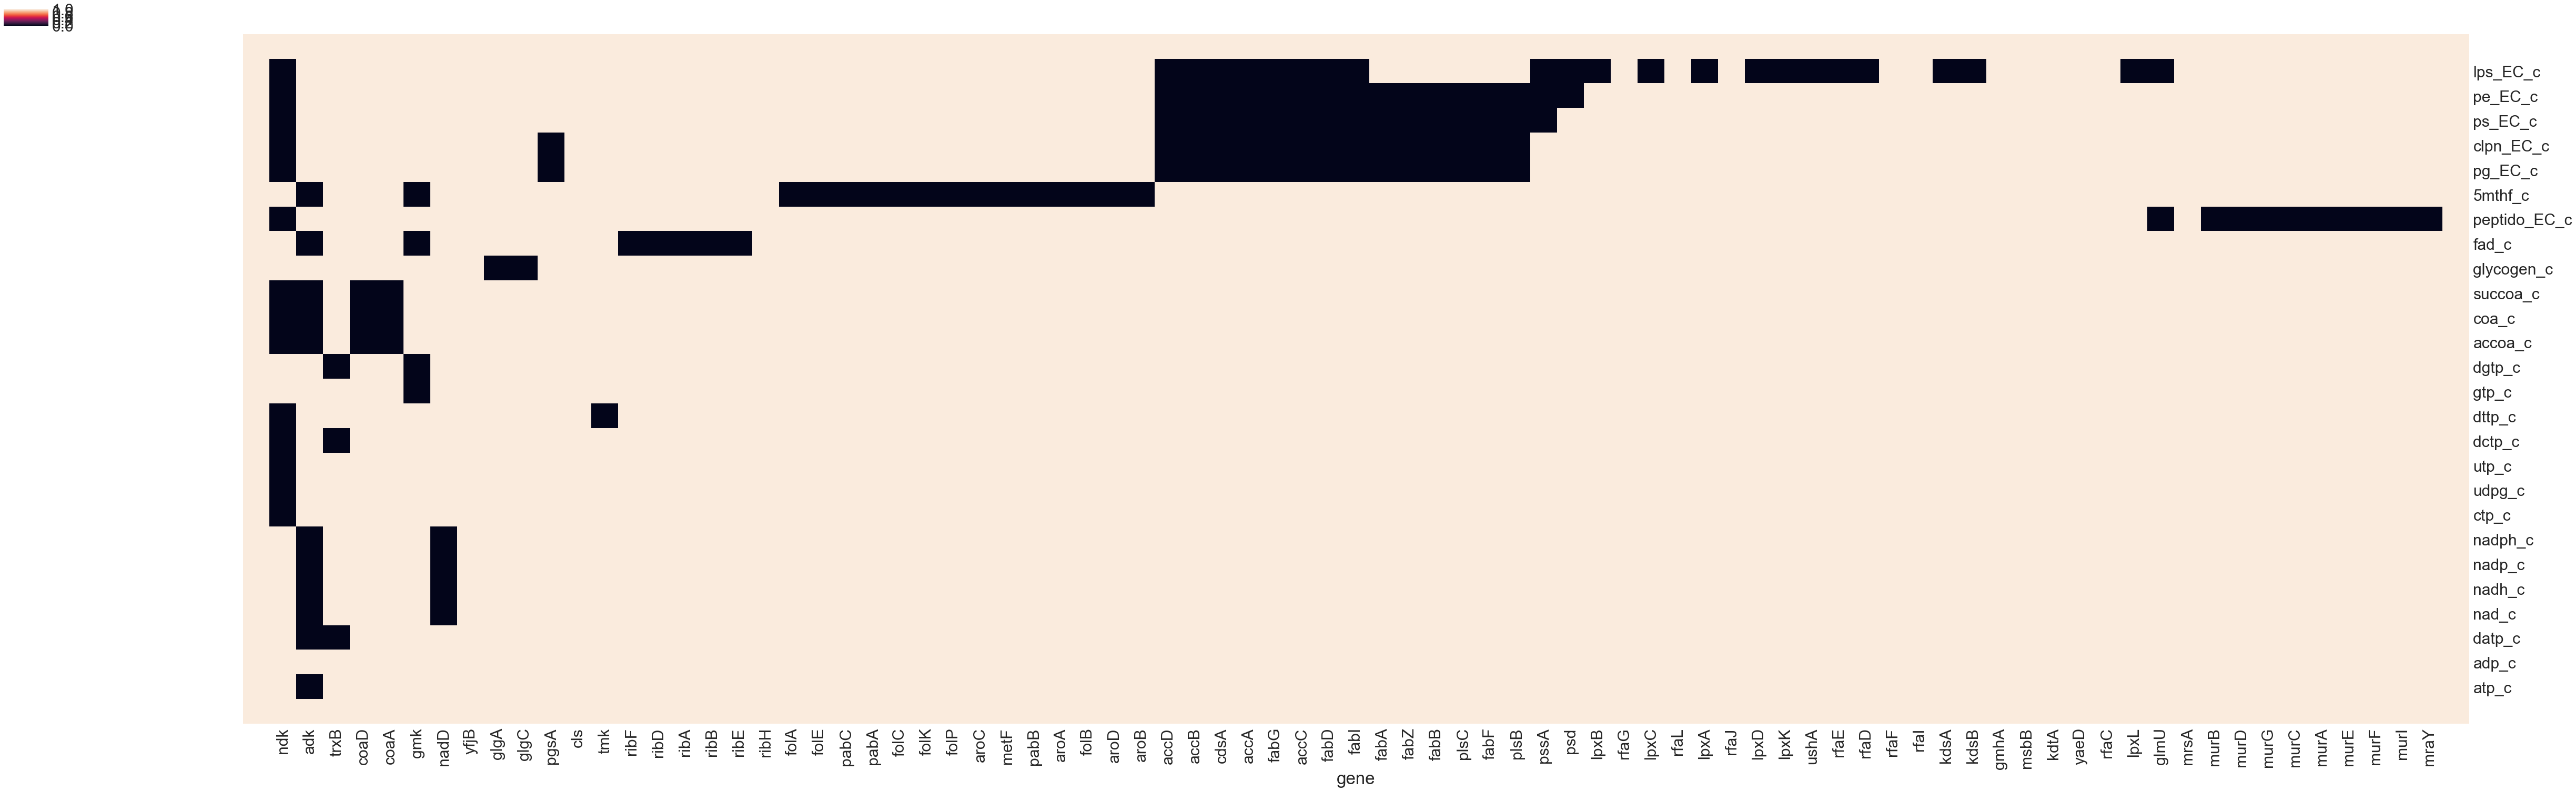

In [50]:
%matplotlib inline
import seaborn as sns; sns.set(color_codes=True)
sns.set(font_scale=3)
#producible_mets_of_gene_df = pd.read_csv('Producible_metabolites-gene-ko.csv',index_col=0)
#nonproducible_mets_of_gene_df = pd.read_csv('Nonproducible_metabolites-gene-ko.csv',index_col=0)
g = sns.clustermap(oks.loc[fig_1_metab_order,fig_1_gene_order].fillna(1),
                   figsize=oks.T.shape,
                  row_cluster=False,
                  col_cluster=False)
g.savefig('metabolite_producibility_cobra_rich_media.png')

### CVXPy implementation

In [19]:
biomass_rxn = 'BIOMASS_Ecoli'

Sdf, lower_series, upper_series = makeS_and_rxn_bounds( ijr904 )
rxns = [rxn for rxn in Sdf.columns]
mets = [met for met in Sdf.index]
m,n = Sdf.shape
biomass = Sdf.columns.get_loc(biomass_rxn)

biomass_components = ijr904.reactions.BIOMASS_Ecoli.reactants
biomass_component_locs = [Sdf.index.get_loc(component.id) + len(rxns)
                          for component in biomass_components]

In [15]:
alpha=1
Sbar = makeSbar( S )
lower_bound_bar, upper_bound_bar = makeBarBounds( m, lower_bounds, upper_bounds, alpha)
vbar = cvx.Variable(n+m)
metabolite_production = {}
for component in ijr904.reactions.BIOMASS_Ecoli.reactants:
    component_loc = len(rxns) + Sdf.index.get_loc(component.id) 
    component_stoichiometry = np.abs(ijr904.reactions.BIOMASS_Ecoli.get_coefficient( component.id ))
    objective = cvx.Maximize( vbar[component_loc]/component_stoichiometry)
    such_that = [Sbar*vbar == 0,
                lower_bound_bar <= vbar,
                vbar <= upper_bound_bar]

    problem = cvx.Problem(objective, such_that)
    problem.solve()
    metabolite_production[('wild-type',component.id, component_stoichiometry)]= objective.value
metabolite_production

{('wild-type', '5mthf_c', 0.05): 1.695707200686839,
 ('wild-type', 'accoa_c', 5e-05): 0.4070902653180196,
 ('wild-type', 'ala__L_c', 0.488): 2.049160976019824,
 ('wild-type', 'amp_c', 0.001): 999.957413776879,
 ('wild-type', 'arg__L_c', 0.281): 3.5586621577319844,
 ('wild-type', 'asn__L_c', 0.229): 4.3668370509413945,
 ('wild-type', 'asp__L_c', 0.229): 4.366625743059594,
 ('wild-type', 'atp_c', 45.7318): 0.021858430063136938,
 ('wild-type', 'clpn_EC_c', 0.000129): -27.52544066316266,
 ('wild-type', 'coa_c', 6e-06): 3.7651253058144585,
 ('wild-type', 'ctp_c', 0.126): 7.935795836651791,
 ('wild-type', 'cys__L_c', 0.087): 12.597302114053315,
 ('wild-type', 'datp_c', 0.0247): 40.48801057374742,
 ('wild-type', 'dctp_c', 0.0254): 39.37226908688519,
 ('wild-type', 'dgtp_c', 0.0254): 39.36878297035025,
 ('wild-type', 'dttp_c', 0.0247): 40.49051626380261,
 ('wild-type', 'fad_c', 1e-05): -2.6172224924996135,
 ('wild-type', 'gln__L_c', 0.25): 4.000485906497623,
 ('wild-type', 'glu__L_c', 0.25): 4

## Dual variable Metabolite Producibility implementation


In [10]:
cvx_fluxes.loc['BIOMASS_Ecoli']

Flux    0.906511
Name: BIOMASS_Ecoli, dtype: float64

## First compute the wild-type producible and nonproducible metabolites

In [11]:

alpha = 1
Sbar = makeSbar( S )
lower_bound_bar, upper_bound_bar = makeBarBounds( m, lower_bounds, upper_bounds, alpha)
vbar = cvx.Variable(n+m)
i=0

objective = cvx.Maximize( vbar[biomass])
such_that = [Sbar*vbar == 0,
                lower_bound_bar <= vbar,
                vbar <= upper_bound_bar]

problem = cvx.Problem(objective, such_that)
problem.solve()
producible_mets = pd.DataFrame({'normal':
                                          np.squeeze(np.asarray(vbar.value[n:]))},
                                         index=mets)

g = such_that[0].dual_value
nonproducible_mets = pd.DataFrame({'normal':np.squeeze(np.asarray(Sbar.T.dot(g)))[n:]}, index=mets)
nonproducible_mets[nonproducible_mets > 1e-3].dropna()

,normal
10fthf_c,0.004075
12dgr_EC_c,3.293121
23ddhb_c,0.089498
23dhb_c,0.081839
2dmmq8_c,0.132186
2dmmql8_c,0.153128
2kmb_c,0.008625
2mahmp_c,0.002193
2me4p_c,0.008978
2ohph_c,0.114387


## Producible and nonproducible metabolites for all reaction knockouts 

In [12]:
threshold = 1e-3
for j in range(n):
    try:
        objective = cvx.Maximize( vbar[biomass])
        such_that = [Sbar.dot(vbar) == 0,
                lower_bound_bar <= vbar,
                vbar <= upper_bound_bar,
                vbar[j] == 0]

        problem = cvx.Problem(objective, such_that)
        problem.solve()
        
        producible_mets[rxns[j]] = pd.Series( np.squeeze(np.asarray(vbar.value[n:])), index=mets)
        g = such_that[0].dual_value
        nonproducible_mets[rxns[j]] = pd.Series(np.squeeze(np.asarray(Sbar.T.dot(g)))[n:], index=mets)
    except cvx.SolverError:
        producible_mets[rxns[j]] = 0
        nonproducible_mets[rxns[j]] = 0
    
producible_mets.to_csv('Producible_metabolites.csv',)
nonproducible_mets.to_csv('Nonproducible_metabolites.csv')

## Producible and nonproducible metabolites for all gene knockouts using dual variable approach

In [15]:
threshold = 1e-3
producible_mets_of_gene = {}
nonproducible_mets_of_gene = {}
gene_rxn_rules = cobra.manipulation.delete.get_compiled_gene_reaction_rules(ijr904)
for gene in ijr904.genes:
    rxn_ko = cobra.manipulation.delete.find_gene_knockout_reactions(ijr904, 
                                                                    [gene], 
                                                                    gene_rxn_rules)
    kos = [rxns.index(rxn.id) for rxn in rxn_ko]
    try:
        objective = cvx.Maximize( vbar[biomass])
        constraints = [Sbar.dot(vbar) == 0,
                       lower_bound_bar <= vbar,
                       upper_bound_bar >= vbar] + \
                      [vbar[ko] == 0 for ko in kos]

        problem = cvx.Problem(objective, constraints)
        problem.solve()
        
        producible_mets_of_gene[gene.id] = pd.Series( np.squeeze(
                                                      np.asarray(
                                                            vbar.value[n:])), 
                                                     index=mets)
        g = constraints[0].dual_value
        nonproducible_mets_of_gene[gene.id] = pd.Series(np.squeeze(
                                                        np.asarray(
                                                            Sbar.T.dot(g)))[n:],
                                                        index=mets)
    except cvx.SolverError:
        producible_mets_of_gene[gene.id] = 0
        nonproducible_mets_of_gene[gene.id] = 0
    
pd.DataFrame(producible_mets_of_gene).to_csv('Producible_metabolites-gene-ko.csv',)
pd.DataFrame(nonproducible_mets_of_gene).to_csv('Nonproducible_metabolites-gene-ko.csv')

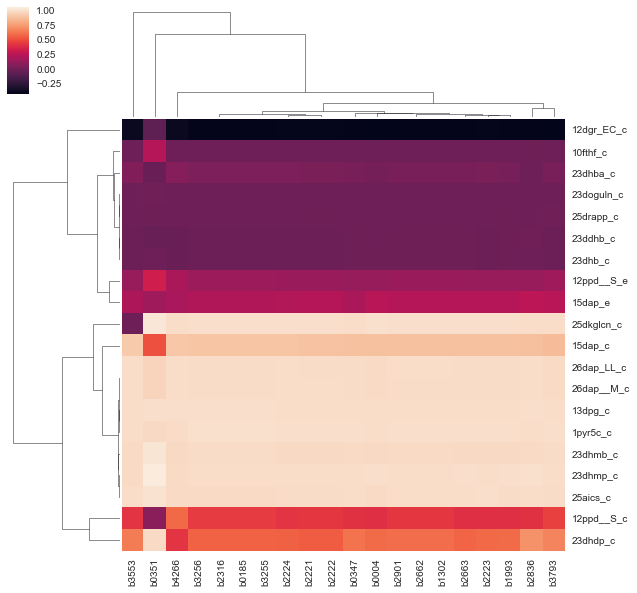

In [5]:
%matplotlib inline
import seaborn as sns; sns.set(color_codes=True)
producible_mets_of_gene_df = pd.read_csv('Producible_metabolites-gene-ko.csv',index_col=0)
nonproducible_mets_of_gene_df = pd.read_csv('Nonproducible_metabolites-gene-ko.csv',index_col=0)
g = sns.clustermap(producible_mets_of_gene_df.iloc[:20,:20])

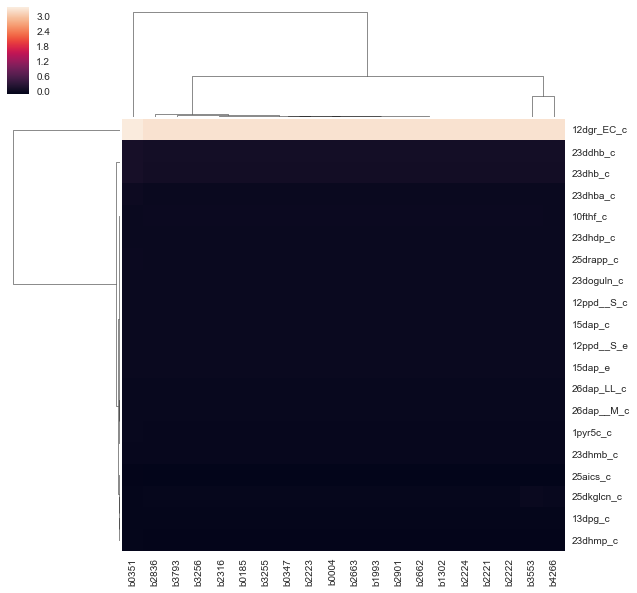

In [7]:

g = sns.clustermap(nonproducible_mets_of_gene_df.iloc[:20,:20])

In [15]:
nonproducible_mets_of_gene = pd.read_csv('Nonproducible_metabolites-gene-ko.csv',index_col=0)
threshold = 1e-3
nonproducible_mets = {}
for gene in nonproducible_mets_of_gene.columns:
    nonproducible_mets[gene] = nonproducible_mets_of_gene[gene][nonproducible_mets_of_gene[gene] > threshold]


In [17]:
sorted_genes = sorted(nonproducible_mets.keys(), 
              key=lambda x: len(nonproducible_mets[x]))
lowgene = sorted_genes[0]
nonproducible_mets[lowgene][nonproducible_mets[lowgene] > threshold].to_frame(lowgene)

,b2551
12dgr_EC_c,3.216952
23ddhb_c,0.082111
23dhb_c,0.075342
2dmmq8_c,0.140944
2dmmql8_c,0.160622
2kmb_c,0.002366
2me4p_c,0.005539
2ohph_c,0.124320
2ombzl_c,0.137717
2omhmbl_c,0.151091


In [18]:
#sorted_genes = sorted(nonproducible_mets_of_gene.keys(), 
#              key=lambda x: len(nonproducible_mets_of_gene[x]))
highgene = sorted_genes[-1]
nonproducible_mets[highgene][nonproducible_mets[highgene] > threshold].to_frame(highgene)

,b3429
12dgr_EC_c,1.781274
23ddhb_c,0.066195
23dhb_c,0.064239
23dhba_c,0.034304
23dhdp_c,0.002635
23doguln_c,0.001511
25drapp_c,0.011934
2dda7p_c,0.010222
2dhp_c,0.008632
2dmmq8_c,0.100838


In [26]:
producible_mets_of_gene = pd.read_csv('Producible_metabolites-gene-ko.csv',index_col=0)
producible_mets_of_gene

,b3553,b0347,b0004,b4266,b2836,b3793,b2901,b2662,b1302,b2663,...,b2498,b2497,b1006,b3572,b4197,b3565,b3568,b3567,b3566,b4031
10fthf_c,-0.002741,-0.000638,-0.002890,-0.002501,-0.008388,-0.001119,-0.000489,-0.000416,-0.000416,-0.001370,...,-0.000295,-0.000066,0.126142,-0.001131,-0.001300,0.008317,-0.000392,-0.000392,-0.000392,-0.001038
12dgr_EC_c,-0.382575,-0.410700,-0.418321,-0.376997,-0.407063,-0.418595,-0.410576,-0.410693,-0.410693,-0.411548,...,-0.410131,-0.410174,-0.192075,-0.413644,-0.411634,-0.432811,-0.410796,-0.410796,-0.410796,-0.403215
12ppd__S_c,0.429660,0.420259,0.412936,0.596146,0.422321,0.468292,0.435539,0.435123,0.435123,0.414186,...,0.428544,0.442558,0.415189,0.435826,0.462567,0.465170,0.436602,0.436602,0.436602,0.461550
12ppd__S_e,0.146240,0.138498,0.139163,0.202133,0.144439,0.159849,0.148809,0.148689,0.148689,0.141741,...,0.146545,0.151172,0.145524,0.148815,0.158067,0.158707,0.149285,0.149285,0.149285,0.157604
13dpg_c,1.004627,1.002642,1.001210,1.006735,1.007640,1.000995,1.005298,1.005267,1.005267,1.005808,...,1.005336,1.005755,1.003792,1.004547,1.005634,1.007499,1.005285,1.005285,1.005285,1.005866
15dap_c,0.929128,0.891148,0.891132,0.915568,0.889525,0.876388,0.895312,0.895373,0.895373,0.893609,...,0.887939,0.897653,0.687743,0.914309,0.903741,0.910549,0.894839,0.894839,0.894839,0.901088
15dap_e,0.213174,0.209211,0.255141,0.197513,0.263234,0.252113,0.233533,0.233385,0.233385,0.233999,...,0.244338,0.233129,0.390442,0.199998,0.231319,0.235442,0.233711,0.233711,0.233711,0.232047
1pyr5c_c,1.001749,1.009786,1.004627,0.998227,1.001890,1.010161,1.010138,1.010104,1.010104,1.008523,...,1.010011,1.011063,1.028652,1.009135,1.008275,1.002768,1.010137,1.010137,1.010137,1.013544
23ddhb_c,-0.013414,-0.006082,-0.002397,-0.020130,0.004524,-0.009645,-0.008061,-0.007859,-0.007859,-0.007087,...,-0.008100,-0.005542,0.006352,-0.005761,-0.006663,-0.002159,-0.007795,-0.007795,-0.007795,-0.012568
23dhb_c,-0.012375,-0.007808,-0.004856,-0.017381,-0.000446,-0.013548,-0.007300,-0.007179,-0.007179,-0.006614,...,-0.007075,-0.004965,0.013334,-0.007020,-0.009034,-0.007888,-0.007106,-0.007106,-0.007106,-0.011964


In [28]:
np.zeros(10)[[]] == 0


array([], dtype=bool)

In [15]:
!ls -ltrh

total 5968864
drwxrwxr-x@  4 zuck016  PNL\Domain Users   136B Aug  8  2013 __MACOSX
-rw-r--r--@  1 zuck016  PNL\Domain Users   140K May 23  2016 biopax3.zip
drwxr-xr-x@ 27 zuck016  PNL\Domain Users   918B May 23  2016 biopax3
-rw-r--r--@  1 zuck016  PNL\Domain Users    26K May 27  2016 160510_UDN oxylipid data-Key_Pathways.xlsx
-rw-r--r--   1 zuck016  PNL\Domain Users   758K May 31  2016 instance-class.tsv
-rw-r--r--   1 zuck016  PNL\Domain Users   156K May 31  2016 class-superclass.tsv
-rw-r--r--@  1 zuck016  PNL\Domain Users   724K Jun 15  2016 2016_CurrOpin_Johns.pdf
-rw-r--r--@  1 zuck016  PNL\Domain Users   781K Jun 15  2016 pathways (version 1).csv
-rw-r--r--   1 zuck016  PNL\Domain Users    11M Nov 29 10:15 RECON1.xml
-rw-r--r--   1 zuck016  PNL\Domain Users    88K Nov 30 16:05 Metacyc2bigg.tsv
-rw-r--r--   1 zuck016  PNL\Domain Users    57K Nov 30 16:06 Mapping Metabolites and Lipids.ipynb
-rw-r--r--   1 zuck016  PNL\Domain Users   1.9M Mar 10 01:57 bigg_pubchem_xref.tsv
-rw-r-

In [26]:
nonproducible_mets = pd.read_csv('Nonproducible_metabolites-6797-7440.csv',index_col=0)


5063

In [36]:
nonproducible_mets.iloc[:size,:size].to_csv('Nonproducible_metabolites.10x10.csv')

In [27]:
import plotly.plotly as py
import plotly.graph_objs as go
size = 10
trace = go.Heatmap(z=nonproducible_mets.values[:size,:size],
                   x=nonproducible_mets.index[:size],
                   y=nonproducible_mets.columns[:size])
data=[trace]
py.iplot(data, filename='labelled-heatmap')

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.

In [35]:
from ggplot import ggplot, aes, geom_tile, scale_color_gradient
nonproducible_melt = pd.melt(nonproducible_mets.iloc[:size,:size])
nonproducible_melt[nonproducible_melt['value'] > 1]

,variable,value
71,10FTHFtl,1.442425
74,10FTHFtl,1.243726
77,10FTHFtl,1.074425


In [34]:
ggplot(aes("variable", "value"),nonproducible_melt) + \
    geom_tile(aes(fill = "rescale"), colour = "white") + \
    scale_color_gradient(low="white",high="steelblue")
    

TypeError: can't multiply sequence by non-int of type 'float'

In [21]:
trace = go.Heatmap(z=nonproducible_mets.values, x=nonproducible_mets.index,y=nonproducible_mets.columns)
nonproducible_data=[trace]
py.iplot(nonproducible_data, filename='nonproducible_mets.heatmap')

SysCallError: (32, 'EPIPE')

In [82]:
producible_mets = pd.read_csv('MetaboliteProducibility/Producible_metabolites-6797-7440.csv',index_col=0)

In [11]:
nonproducible_mets

,normal,10FTHF5GLUtl,10FTHF5GLUtm,10FTHF6GLUtl,10FTHF6GLUtm,10FTHF7GLUtl,10FTHF7GLUtm,10FTHFtl,10FTHFtm,11DOCRTSLtm,...,EX_ahcys_LPAREN_e_RPAREN_,EX_aicar_LPAREN_e_RPAREN_,EX_anth_LPAREN_e_RPAREN_,EX_cbasp_LPAREN_e_RPAREN_,EX_mal_L_LPAREN_e_RPAREN_,MAL_Lte,OROTGLUt,PNTOte,IDOURte,EX_idour_LPAREN_e_RPAREN_
10fthf5glu_c,-2.061198e-12,3.418070e-13,3.874178e-13,-5.644749e-14,-3.273612e-12,-2.926996e-12,2.287683e-13,5.372110e-01,3.416559e-13,3.704613e-13,...,1.776701e-13,4.215034e-13,3.003362e-13,-2.253682e-13,2.396560e-13,5.185068e-13,1.689426e-13,5.233490e-13,-2.727316e-12,-1.992693e-12
10fthf5glu_l,7.541321e-12,1.886074e-14,1.095046e-13,3.606853e-13,8.464125e-12,1.420766e-11,8.647614e-14,1.442425e+00,9.074323e-14,9.876484e-14,...,5.394254e-14,1.112190e-13,8.259329e-14,5.375788e-13,1.113243e-13,1.418889e-13,5.034125e-14,1.348467e-13,4.325411e-12,3.126367e-12
10fthf5glu_m,-1.221590e-11,7.304408e-14,5.931322e-14,-6.168691e-13,-1.307650e-11,-2.312980e-11,5.642143e-14,2.479209e-01,1.508023e-13,1.622764e-13,...,7.135172e-14,1.873874e-13,1.280109e-13,-1.059255e-12,2.034706e-14,2.180922e-13,6.745550e-14,2.355166e-13,-1.048109e-11,-7.641939e-12
10fthf6glu_c,-4.443341e-13,-1.378420e-14,-3.099552e-14,1.845447e-13,-3.412056e-12,3.622351e-12,-5.714699e-14,7.465168e-01,-4.165653e-14,-4.500244e-14,...,-2.044355e-14,-5.041029e-14,-3.679090e-14,-1.234042e-13,-5.308218e-14,-6.854786e-14,-2.037692e-14,-6.328823e-14,-2.034461e-12,-1.496067e-12
10fthf6glu_l,7.693256e-12,9.553406e-16,-1.571210e-14,3.429730e-13,8.461917e-12,1.225040e-11,-7.611329e-15,1.243726e+00,-2.606351e-14,-2.806150e-14,...,-6.880101e-15,-3.287086e-14,-2.051035e-14,5.323120e-13,1.682815e-14,-3.870501e-14,-7.752687e-15,-4.392299e-14,4.091267e-12,2.954116e-12
10fthf6glu_m,-1.190113e-11,-8.677869e-14,-6.227309e-14,-5.623452e-13,-8.423204e-12,-1.438999e-11,-7.404451e-14,4.385528e-01,-4.239528e-14,-4.627998e-14,...,-2.866197e-14,-4.945933e-14,-4.136416e-14,-1.056308e-12,-1.349882e-13,-7.779071e-14,-2.793314e-14,-5.860030e-14,-1.072620e-11,-7.825108e-12
10fthf7glu_c,2.313379e-12,-3.518028e-13,-4.648408e-13,1.508163e-13,2.470256e-12,7.675403e-01,-4.308603e-13,9.278602e-01,-4.830789e-13,-5.227978e-13,...,-2.478493e-13,-5.933031e-13,-4.242074e-13,7.738629e-14,-3.808948e-13,-7.430373e-13,-2.373145e-13,-7.385578e-13,-3.792409e-13,-2.960385e-13
10fthf7glu_l,6.469493e-12,-1.003490e-13,-1.593167e-13,3.169143e-13,7.133762e-12,-6.509856e-11,-1.375756e-13,1.074425e+00,-1.692081e-13,-1.831763e-13,...,-8.236317e-14,-2.087695e-13,-1.470187e-13,4.147091e-13,-1.078050e-13,-2.600845e-13,-7.964706e-14,-2.618170e-13,2.798090e-12,2.011532e-12
10fthf7glu_m,-6.830307e-12,-2.262965e-13,-2.499487e-13,-3.137200e-13,-5.825430e-12,4.227245e-01,5.435068e-01,6.724404e-01,-2.518639e-13,-2.728404e-13,...,-1.340747e-13,-3.076736e-13,-2.239768e-13,-6.662333e-13,-2.685411e-13,-3.962050e-13,-1.286121e-13,-3.808266e-13,-7.363542e-12,-5.378494e-12
10fthf_c,-1.136238e-12,-7.732684e-14,-9.157371e-14,-5.787013e-14,-1.304707e-12,-2.376166e-12,-7.355598e-14,-1.263151e-13,-1.045516e-13,-1.078740e-13,...,-5.025313e-14,-1.206041e-13,-8.818463e-14,-9.455986e-14,-8.396466e-14,-1.538054e-13,-4.923247e-14,-1.523126e-13,-9.325270e-13,-6.756354e-13


In [12]:
producible_mets

,normal,10FTHF5GLUtl,10FTHF5GLUtm,10FTHF6GLUtl,10FTHF6GLUtm,10FTHF7GLUtl,10FTHF7GLUtm,10FTHFtl,10FTHFtm,11DOCRTSLtm,...,EX_ahcys_LPAREN_e_RPAREN_,EX_aicar_LPAREN_e_RPAREN_,EX_anth_LPAREN_e_RPAREN_,EX_cbasp_LPAREN_e_RPAREN_,EX_mal_L_LPAREN_e_RPAREN_,MAL_Lte,OROTGLUt,PNTOte,IDOURte,EX_idour_LPAREN_e_RPAREN_
10fthf5glu_c,5.117993e-01,4.892716e-01,5.182197e-01,5.062919e-01,5.154714e-01,5.084395e-01,5.082636e-01,3.599619e-14,5.068862e-01,5.070906e-01,...,4.953058e-01,5.023326e-01,5.075738e-01,5.129394e-01,5.150107e-01,5.148949e-01,5.016777e-01,5.081237e-01,5.154535e-01,5.154179e-01
10fthf5glu_l,4.650733e-01,4.647517e-01,4.637111e-01,4.664334e-01,4.658874e-01,4.688052e-01,4.652201e-01,-2.680335e-14,4.631832e-01,4.628356e-01,...,4.549873e-01,4.599002e-01,4.628651e-01,4.687103e-01,4.720189e-01,4.698489e-01,4.601015e-01,4.626805e-01,4.735649e-01,4.735687e-01
10fthf5glu_m,5.608766e-01,5.543299e-01,5.479780e-01,5.585562e-01,5.568211e-01,5.547426e-01,5.537806e-01,1.229230e-13,5.554697e-01,5.571323e-01,...,5.475241e-01,5.533435e-01,5.576083e-01,5.608906e-01,5.613594e-01,5.622007e-01,5.525849e-01,5.584980e-01,5.611387e-01,5.611106e-01
10fthf6glu_c,5.047661e-01,4.959866e-01,5.058007e-01,4.837888e-01,5.168598e-01,4.941254e-01,5.060680e-01,1.189746e-14,5.023773e-01,5.030060e-01,...,4.963623e-01,5.006108e-01,5.031066e-01,5.073005e-01,5.132036e-01,5.130020e-01,5.010157e-01,5.038069e-01,5.113506e-01,5.113275e-01
10fthf6glu_l,4.650253e-01,4.638256e-01,4.649212e-01,4.684918e-01,4.665578e-01,4.739036e-01,4.679490e-01,-2.092612e-14,4.635799e-01,4.636551e-01,...,4.571007e-01,4.613928e-01,4.635827e-01,4.691282e-01,4.748275e-01,4.728491e-01,4.619048e-01,4.635683e-01,4.748925e-01,4.748894e-01
10fthf6glu_m,5.598583e-01,5.542317e-01,5.519173e-01,5.538344e-01,5.384613e-01,5.356625e-01,5.421861e-01,5.907031e-14,5.560782e-01,5.575323e-01,...,5.502085e-01,5.549347e-01,5.578149e-01,5.608103e-01,5.650127e-01,5.656614e-01,5.545940e-01,5.586286e-01,5.622370e-01,5.622036e-01
10fthf7glu_c,4.920929e-01,4.918451e-01,4.953468e-01,4.872686e-01,4.927626e-01,-2.940746e-11,5.098904e-01,-8.236982e-15,4.926072e-01,4.936456e-01,...,4.932465e-01,4.939908e-01,4.933382e-01,4.957903e-01,5.063991e-01,5.065195e-01,4.957601e-01,4.943169e-01,5.014572e-01,5.014391e-01
10fthf7glu_l,4.715241e-01,4.703050e-01,4.724349e-01,4.712309e-01,4.726964e-01,6.426386e-01,4.809852e-01,-7.333916e-15,4.706146e-01,4.711693e-01,...,4.661210e-01,4.697102e-01,4.709906e-01,4.760238e-01,4.842669e-01,4.826601e-01,4.704889e-01,4.711538e-01,4.824272e-01,4.824193e-01
10fthf7glu_m,5.365852e-01,5.336567e-01,5.347365e-01,5.311835e-01,5.280423e-01,2.825439e-11,1.284232e-13,1.852068e-14,5.347692e-01,5.359764e-01,...,5.317638e-01,5.347050e-01,5.360061e-01,5.388504e-01,5.472879e-01,5.481699e-01,5.355951e-01,5.372509e-01,5.426721e-01,5.426339e-01
10fthf_c,5.062129e-01,5.044563e-01,5.052092e-01,5.060543e-01,5.061543e-01,5.060419e-01,5.044042e-01,5.047510e-01,5.053015e-01,5.043506e-01,...,5.013694e-01,5.023739e-01,5.045887e-01,5.055971e-01,5.047015e-01,5.058623e-01,5.033988e-01,5.060364e-01,5.057709e-01,5.057513e-01


# UDN metabolite mapping to BIGG #

In [22]:
def convert_db(fromdb, todb,chemxref ):
    fromxref = chemxref[chemxref['XREF'].str.contains(fromdb + ':')]
    fromcol = fromxref['XREF'].str.split(':',expand=True)[1].copy()
    fromxref.loc[:,fromdb] = fromcol
    toxref = chemxref[chemxref['XREF'].str.contains(todb + ':')]
    tocol = toxref['XREF'].str.split(':',expand=True)[1].copy()
    toxref.loc[:,todb] = tocol
    return fromxref.merge(toxref, how='inner', on='MNX_ID',suffixes=(':'+fromdb, ':'+todb))


In [3]:
import pandas as pd
bigg_pubchem = pd.read_table('bigg_pubchem_xref.tsv',comment='#', 
                        names='MNX_reference_ID	name	formula	charge	mass	InChI	SMILES	source	Xrefs	InChIKey	is_polymer	is_generic	is_complex'.split('\t'),index_col='MNX_reference_ID')
allXrefs = bigg_pubchem['Xrefs'].str.split(';',expand=True)
allXrefs.columns

RangeIndex(start=0, stop=214, step=1)

In [27]:
chemxref_url = 'http://www.metanetx.org/cgi-bin/mnxget/mnxref/chem_xref.tsv'
chemxref = pd.read_table('chem_xref.tsv',comment='#', 
                        names='XREF	MNX_ID	Evidence	Description'.split('\t'))
kegg2bigg = convert_db('bigg','kegg',chemxref)
kegg2bigg[['bigg','kegg','Description:bigg','Description:kegg','Evidence:kegg']].to_csv('kegg2bigg.tsv',sep='\t',index=False)

/Users/zuck016/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/pandas/core/indexing.py:337 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zuck016/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/pandas/core/indexing.py:517 SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
humancyc_mets = pd.read_table('UDN Metabolites/humancyc-mets.tsv').set_index('FrameName')
humancyc_mets

""
FrameName
HX
CPD-488
CPD-4504
CPD-3483
CPD-18088
PRENAL
PHOSPHORYL-ETHANOLAMINE
CPD-261
CPD-14424


In [5]:
chemxref = pd.read_table('http://www.metanetx.org/cgi-bin/mnxget/mnxref/chem_xref.tsv',comment='#', 
                        names='XREF	MNX_ID	Evidence	Description'.split('\t'))



In [85]:
metacyc2bigg = convert_db( 'metacyc', 'bigg', chemxref)[
    ['metacyc','bigg', 'Description:bigg']].drop_duplicates(subset='metacyc').set_index('metacyc')
humancyc_mets['bigg'] = metacyc2bigg['bigg']
humancyc2bigg = humancyc_mets.dropna()
humancyc2bigg['DB'] = 'BIGG-CPDS'
humancyc2bigg[['DB','bigg']].to_csv('HumanCyc.BIGG.dblinks',sep='\t')

/Users/zuck016/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/zuck016/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/zuck016/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [85]:
metacyc2mnx = convert_db( 'metacyc', 'metanetx', chemxref)[
    ['metacyc','bigg', 'Description:bigg']].drop_duplicates(subset='metacyc').set_index('metacyc')
humancyc_mets['bigg'] = metacyc2bigg['bigg']
humancyc2bigg = humancyc_mets.dropna()
humancyc2bigg['DB'] = 'BIGG-CPDS'
humancyc2bigg[['DB','bigg']].to_csv('HumanCyc.BIGG.dblinks',sep='\t')

/Users/zuck016/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/zuck016/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/zuck016/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [74]:
udn = pd.read_table(
    'UDN Metabolites/UDN_P&U_Metabolites_PNNL_Name_Conversion_May10.csv').drop_duplicates(
    subset='Metacyc Object ID').set_index('Metacyc Object ID')
udn2bigg= humancyc2bigg.loc[udn.index].dropna()
udn2bigg

,bigg
Metacyc Object ID,
2-AMINOACRYLATE,2amac
2-KETOGLUTARATE,akg
5-OXOPROLINE,5oxpro
ASN,asn__L
CHOLESTEROL,chsterol
CPD-108,4crsol
CPD-110,salc
CPD-660,mal__D
CPD-7836,ttdca


In [84]:
bigg2udn = udn2bigg.reset_index().set_index('bigg')
udn_mets = [met for met in nonproducible_mets.index if met[:-2] in bigg2udn.index]
nonproducible_mets.loc[udn_mets].T.to_csv('MetaboliteProducibility/nonproducible_udn_mets.csv')
producible_mets.loc[udn_mets].T.to_csv('MetaboliteProducibility/producible_udn_mets.csv')

In [100]:
udn_producible_mets = producible_mets.loc[udn_mets].T
udn_nonproducible_mets = nonproducible_mets.loc[udn_mets].T
udn_nonproducible_mets[udn_nonproducible_mets > 0.1].dropna(how='all', axis=1).fillna(0).to_csv(
    'MetaboliteProducibility/nonproducible_udn_mets_only.tsv',sep='\t')

In [99]:

udn_producible_mets[udn_producible_mets > 0.1].dropna(how='all', axis=1).fillna(0).to_csv(
    'MetaboliteProducibility/producible_udn_mets_only.tsv',sep='\t')

In [2]:
pubchems = {}
biggs = {}
for mnx in allXrefs.index:
    for col in allXrefs.columns:
        xref = allXrefs.loc[mnx,col]
        if type(xref) is str:
            if 'pubchem' in xref:
                try:
                    pubchems[mnx].add( xref )
                except KeyError:
                    pubchems[mnx] = {xref}
            elif 'bigg' in xref:
                try:
                    biggs[mnx].add(xref)
                except KeyError:
                    biggs[mnx] = {xref}
biggs


{'MNXM558': {'bigg1:2dmmql8[c]',
  'bigg1:2dmmql8_c',
  'bigg1:_2dmmql8_c',
  'bigg:2dmmql8'},
 'MNXM3230': {'bigg1:1btol_c',
  'bigg1:btoh[c]',
  'bigg1:btoh[e]',
  'bigg1:btoh_c',
  'bigg1:btoh_e',
  'bigg1:btoh_p',
  'bigg:1btol',
  'bigg:btoh'},
 'MNXM114303': {'bigg1:hxc2coa_x', 'bigg:hxc2coa'},
 'MNXM2563': {'bigg1:hpglu_c',
  'bigg1:hpglu_m',
  'bigg1:thglu[c]',
  'bigg1:thglu_c',
  'bigg:hpglu'},
 'MNXM393': {'bigg1:sbt6p_c', 'bigg:sbt6p'},
 'MNXM55163': {'bigg:34633'},
 'MNXM626': {'bigg1:4tmeabutn[c]',
  'bigg1:4tmeabutn_c',
  'bigg1:gbbtn_c',
  'bigg1:gbbtn_e',
  'bigg1:gbbtn_p',
  'bigg:4tmeabutn',
  'bigg:53567',
  'bigg:gbbtn'},
 'MNXM14': {'bigg1:amp[c]',
  'bigg1:amp[e]',
  'bigg1:amp[g]',
  'bigg1:amp[l]',
  'bigg1:amp[m]',
  'bigg1:amp[n]',
  'bigg1:amp[r]',
  'bigg1:amp[x]',
  'bigg1:amp_c',
  'bigg1:amp_e',
  'bigg1:amp_g',
  'bigg1:amp_h',
  'bigg1:amp_l',
  'bigg1:amp_m',
  'bigg1:amp_n',
  'bigg1:amp_p',
  'bigg1:amp_r',
  'bigg1:amp_x',
  'bigg:amp'},
 'MNXM696'

In [9]:
import pickle
def reverse_dict( d ):
    r = {}
    for k in d:
        for value in d[k]:
            if type(value) is str:
                identifier= value.split(':')
                try:
                    r[identifier[1]].add(k)
                except KeyError:
                    r[identifier[1]] = {k}
    return r


pubchem2mnx = reverse_dict(pubchems)
with open('pubchem2mnx.pickle','wb') as out:
    pickle.dump(pubchem2mnx,out)

pubchem2bigg ={}
for pubchem in pubchem2mnx:
    for mnx in pubchem2mnx[pubchem]:
        if mnx in biggs:
            try:
                pubchem2bigg[pubchem] |= biggs[mnx]
            except KeyError:
                pubchem2bigg[pubchem] = biggs[mnx]

with open('pubchem2bigg.pickle', 'wb') as out:
    pickle.dump(pubchem2bigg,out)

In [10]:
bigg2pubchem = {}
bigg2mnx  = reverse_dict(biggs)
for bigg in bigg2mnx:
    for mnx in bigg2mnx[bigg]:
        if mnx in pubchems:
            try:
                bigg2pubchem[bigg] |= pubchems[mnx]
            except KeyError:
                bigg2pubchem[bi= pubchems[mnx]

with open('bigg2pubchem.pickle','wb') as out:
    pickle.dump(bigg2pubchem, out)

In [11]:
import os
os.listdir('.')

['#RECON1.xml#',
 '.#RECON1.xml',
 '.DS_Store',
 '.ipynb_checkpoints',
 '160510_UDN oxylipid data-Key_Pathways.xlsx',
 '2016_CurrOpin_Johns.pdf',
 '__MACOSX',
 'bigg2pubchem.json',
 'bigg2pubchem.pickle',
 'bigg_pubchem_xref.tsv',
 'biopax3',
 'biopax3.zip',
 'class-superclass.tsv',
 'CycShare',
 'instance-class.tsv',
 'Mapping Metabolites and Lipids.ipynb',
 'Metabolite Producibility.ipynb',
 'Metacyc2bigg.tsv',
 'Nonproducible_metabolites-6797-7440.csv',
 'Nonproducible_metabolites.csv',
 'Normal-producible-metabolites.csv',
 'pathways (version 1).csv',
 'Producible_metabolites-6797-7440.csv',
 'Producible_metabolites.csv',
 'pubchem2bigg.json',
 'pubchem2bigg.pickle',
 'pubchem2mnx.json',
 'pubchem2mnx.pickle',
 'RECON1.xml',
 'recon2.v.02.zip',
 'recon2_02']

In [18]:
pubchem2bigg

{'7403': {'bigg1:uAgla_c',
  'bigg1:uGgla[c]',
  'bigg1:uGgla_c',
  'bigg:uAgla',
  'bigg:uGgla'},
 '47207027': {'bigg1:hdca[c]',
  'bigg1:hdca[e]',
  'bigg1:hdca[l]',
  'bigg1:hdca[r]',
  'bigg1:hdca[x]',
  'bigg1:hdca_c',
  'bigg1:hdca_e',
  'bigg1:hdca_h',
  'bigg1:hdca_p',
  'bigg1:hdca_r',
  'bigg1:hdca_s',
  'bigg1:hdca_x',
  'bigg:34386',
  'bigg:hdca'},
 '14461866': {'bigg1:rml[c]', 'bigg1:rml_c', 'bigg:rml'},
 '25245440': {'bigg1:lnlccoa[c]',
  'bigg1:lnlccoa[m]',
  'bigg1:lnlccoa[r]',
  'bigg1:lnlccoa[x]',
  'bigg1:lnlccoa_c',
  'bigg1:lnlccoa_m',
  'bigg:lnlccoa'},
 '6323351': {'bigg1:CE2705[c]',
  'bigg1:CE2705[n]',
  'bigg1:dhbpt[c]',
  'bigg1:dhbpt_c',
  'bigg:CE2705',
  'bigg:dhbpt'},
 '439451': {'bigg1:1Dgali_c', 'bigg1:1Dgali_h', 'bigg:1Dgali'},
 '7373': {'bigg1:25aics[c]',
  'bigg1:25aics_c',
  'bigg1:25aics_h',
  'bigg1:_25aics_c',
  'bigg:25aics',
  'bigg:44624'},
 '4373': {'bigg1:36dahx_c', 'bigg:36dahx'},
 '103061503': {'bigg1:decdp[c]',
  'bigg1:decdp[m]',
  'big

In [17]:
udn_mets = pd.read_excel('UDN Metabolites/UDN Metabolites_Urine and Plasma_May11.xlsx',sheetname=0,index_col='Pubchem')
udn_bigg = {}
for pc in udn_mets.index:
    try:
        udn_bigg[pc] = pubchem2bigg[str(pc)]
    except KeyError:
        print("{} is not a BIGG molecule".format(pc))
print(len(udn_bigg))

219640 is not a BIGG molecule
14900 is not a BIGG molecule
24699 is not a BIGG molecule
4180364 is not a BIGG molecule
219984 is not a BIGG molecule
188979 is not a BIGG molecule
10253 is not a BIGG molecule
8871 is not a BIGG molecule
50 is not a BIGG molecule
160471 is not a BIGG molecule
250402 is not a BIGG molecule
76720 is not a BIGG molecule
161825 is not a BIGG molecule
102959 is not a BIGG molecule
192742 is not a BIGG molecule
1662 is not a BIGG molecule
441 is not a BIGG molecule
87 is not a BIGG molecule
68328 is not a BIGG molecule
150929 is not a BIGG molecule
151012 is not a BIGG molecule
22275672 is not a BIGG molecule
618137 is not a BIGG molecule
11361 is not a BIGG molecule
68374 is not a BIGG molecule
11671 is not a BIGG molecule
100714 is not a BIGG molecule
439691 is not a BIGG molecule
8285 is not a BIGG molecule
2723872 is not a BIGG molecule
6036 is not a BIGG molecule
439215 is not a BIGG molecule
94715 is not a BIGG molecule
439240 is not a BIGG molecule
4935

In [76]:
udn_metabolites = pd.read_table('CycShare/UDN Metabolites/UDNMetabolites.txt')
pubchemIDs = set(udn_metabolites['PubChem CID'].astype(str).values)
pubchemIDs

{'100714',
 '1015',
 '10253',
 '102959',
 '1030',
 '1061',
 '1066',
 '10690',
 '107735',
 '1081',
 '10975657',
 '11005',
 '1102',
 '11361',
 '11658901',
 '11671',
 '1174',
 '1175',
 '1176',
 '11850',
 '119',
 '119400',
 '12122',
 '123991',
 '127',
 '128869',
 '145742',
 '14900',
 '15047',
 '150929',
 '151012',
 '160471',
 '161825',
 '1662',
 '169019',
 '17106',
 '18189',
 '18411366',
 '18676629',
 '188979',
 '18950',
 '192742',
 '19660',
 '19782904',
 '19789253',
 '204',
 '219640',
 '219984',
 '22275672',
 '23511544',
 '24699',
 '250402',
 '25201103',
 '25202439',
 '2723872',
 '2781043',
 '2879',
 '289',
 '3292996',
 '33032',
 '33037',
 '338',
 '3698251',
 '43',
 '439162',
 '439193',
 '439197',
 '439215',
 '439240',
 '439691',
 '440120',
 '440395',
 '440864',
 '441',
 '44367445',
 '444212',
 '445639',
 '464',
 '487',
 '493591',
 '50',
 '51',
 '5257127',
 '5281',
 '5459794',
 '5460307',
 '5460407',
 '5461016',
 '5779',
 '5793',
 '5862',
 '588',
 '59066632',
 '5950',
 '5951',
 '5961',
 '

In [83]:
len(pubchemIDs & set(pubchem2mnx.keys())), len(pubchemIDs - set(pubchem2mnx.keys()))

(82, 66)

In [84]:
pubchemIDs - set(pubchem2mnx.keys())

{'100714',
 '10253',
 '102959',
 '1030',
 '10975657',
 '11361',
 '11658901',
 '11671',
 '14900',
 '15047',
 '150929',
 '151012',
 '160471',
 '161825',
 '1662',
 '169019',
 '18411366',
 '18676629',
 '188979',
 '192742',
 '19782904',
 '19789253',
 '219640',
 '219984',
 '22275672',
 '23511544',
 '24699',
 '250402',
 '25201103',
 '2723872',
 '2781043',
 '3292996',
 '3698251',
 '43',
 '439197',
 '439215',
 '439240',
 '439691',
 '440395',
 '440864',
 '441',
 '44367445',
 '493591',
 '50',
 '5460407',
 '59066632',
 '6036',
 '618137',
 '6508',
 '6613',
 '66868',
 '68328',
 '68374',
 '68412',
 '7027',
 '75606',
 '76720',
 '79029',
 '8285',
 '853166',
 '87',
 '8871',
 '90658608',
 '9260',
 '92919',
 '94715'}

# UDN metabolite producibilty heatmap #

In [29]:
import pandas as pd
genes_of_rxns = pd.read_table('CycShare/recon2_02/genes_of_reactions.tsv',index_col=0)
udn_producible_mets = pd.read_csv('MetaboliteProducibility/producible_udn_mets.csv',index_col=0)
udn_producible_mets['Gene Name Reaction Rule'] = genes_of_rxns['Gene Name Reaction Rule']
#udn_producible_mets['Gene Reaction Rule'] = genes_of_rxns['Gene Reaction Rule']

udn_producible_mets.index.name = 'Reactions'
udn_producible_mets_gpr = udn_producible_mets.reset_index().set_index(
    ['Reactions',  'Gene Name Reaction Rule']).sort_index(
    level='Gene Name Reaction Rule',ascending=False)
udn_producible_mets_gpr.to_csv(
    'MetaboliteProducibility/udn_producible_mets_gpr.tsv',sep='\t')

In [34]:
udn_nonproducible_mets = pd.read_csv('MetaboliteProducibility/nonproducible_udn_mets.csv',index_col=0)

udn_nonproducible_mets.index.name = 'Reactions'
udn_nonproducible_mets['Gene Name Reaction Rule'] = genes_of_rxns['Gene Name Reaction Rule']
#udn_nonproducible_mets['Gene Reaction Rule'] = genes_of_rxns['Gene Reaction Rule']
udn_nonproducible_mets_gpr = udn_nonproducible_mets.reset_index().set_index(
    ['Reactions','Gene Name Reaction Rule']).sort_index(
    level='Gene Name Reaction Rule', ascending=False)
udn_nonproducible_mets_gpr.to_csv(
    'MetaboliteProducibility/udn_nonproducible_mets_gpr.tsv',sep='\t')
udn_nonproducible_mets_gpr

,,pi_c,2amac_c,pyr_c,L2aadp_c,akg_m,L2aadp_m,akg_c,dopa_c,pi_l,pyr_m,...,ocdca_x,spmd_x,bgly_c,urate_n,urea_n,dopa_l,dopa_x,chsterol_n,inost_g,5oxpro_e
Reactions,Gene Name Reaction Rule,,,,,,,,,,,,,,,,,,,,,
5ADTSTSTERONESULT,SULT2A1,7.718621e-13,-1.683427e-14,-8.375825e-15,-7.902029e-14,1.017343e-13,-1.477578e-13,3.145236e-13,1.059765e-14,1.303491e-13,-7.394616e-14,...,-1.653994e-13,0.299956,0.405344,0.810911,0.405456,0.541344,0.495771,0.410804,0.541321,1.142170e-13
4NPHSULT,SULT1A2 or SULT1A1 or SULT1A2 or SULT1A3 or SULT1A1 or SULT1A3 or SULT1A1 or SULT1A1 or SULT1A3 or SULT1A1,8.380168e-13,-5.767065e-15,4.579533e-17,-8.819181e-14,1.334770e-13,-2.684345e-13,3.617570e-13,-1.595395e-14,1.591979e-13,-7.173538e-14,...,-2.057456e-13,0.298358,0.403977,0.809048,0.404524,0.540502,0.495072,0.409628,0.540461,1.357125e-13
ARGLYSex,SLC7A6 and SLC3A2,8.665653e-13,-1.420117e-14,-8.478237e-15,-9.375128e-14,1.133429e-13,-2.386122e-13,3.585243e-13,-1.658493e-14,1.542061e-13,-8.335686e-14,...,-2.124898e-13,0.300142,0.405585,0.811146,0.405573,0.541538,0.495967,0.411033,0.541520,1.321325e-13
ALAGLYexR,SLC7A10 and SLC3A2,7.592871e-13,-1.853046e-14,-9.184069e-15,-7.981343e-14,1.030101e-13,-1.500091e-13,3.111782e-13,1.072956e-14,1.297225e-13,-7.381369e-14,...,-1.619462e-13,0.301085,0.406763,0.813199,0.406599,0.542887,0.497072,0.412179,0.542843,1.111642e-13
ALADGLYexR,SLC7A10 and SLC3A2,9.030255e-13,-1.576111e-14,-9.477837e-15,-9.833717e-14,1.181879e-13,-2.491860e-13,3.716332e-13,-1.936543e-14,1.574206e-13,-8.784751e-14,...,-2.230277e-13,0.300430,0.405893,0.811624,0.405812,0.541788,0.496142,0.411302,0.541740,1.371786e-13
ALADGLNexR,SLC7A10 and SLC3A2,-3.223499e-14,1.419776e-14,-3.409273e-14,1.105384e-14,-2.913830e-13,-1.123339e-13,-1.362005e-13,-2.344468e-13,-1.046276e-13,-5.952113e-14,...,-2.256188e-13,0.302162,0.408014,0.815538,0.407769,0.544301,0.498398,0.413384,0.544253,-5.095141e-16
ARGtiDF,SLC7A1 or SLC7A2 or SLC38A4 or SLC7A3,1.056124e-12,-2.571078e-14,-1.252910e-14,-1.097487e-13,1.419855e-13,-2.014717e-13,4.323542e-13,1.693184e-14,1.814653e-13,-1.030639e-13,...,-2.235068e-13,0.300230,0.405756,0.811515,0.405758,0.541781,0.496100,0.411206,0.541738,1.547313e-13
ARGt4,SLC6A14,3.928770e-13,-9.210037e-15,-4.689646e-15,-4.143172e-14,5.229279e-14,-8.124854e-14,1.609103e-13,3.222638e-15,6.663988e-14,-3.829987e-14,...,-8.592665e-14,0.300595,0.406052,0.811857,0.405928,0.541911,0.496238,0.411443,0.541859,5.818161e-14
ABUTt4_2_r,SLC6A1 or SLC6A11 or SLC6A13 or SLC6A12,1.081064e-12,-2.642066e-14,-1.322701e-14,-1.106519e-13,1.411509e-13,-1.996691e-13,4.405100e-13,1.700326e-14,1.854189e-13,-1.058841e-13,...,-2.289302e-13,0.300827,0.406410,0.812645,0.406322,0.542244,0.496376,0.411793,0.542166,1.585028e-13


## Plot.ly ##

In [37]:
blocksize = 190
numrxns = len(udn_nonproducible_mets_gpr.index)
print("Numrxns: {}".format(numrxns))
for i in range(numrxns // blocksize + 1):
    print('block {}-{}'.format(blocksize*i, blocksize*(i+1)))
    udn_nonproducible_mets_gpr.iloc[blocksize*i:blocksize*(i+1)].to_csv(
        'MetaboliteProducibility/udn_nonproducible_mets_gpr_{}.tsv'.format(i),sep='\t')
    udn_nonproducible_mets_gpr.iloc[blocksize*i:blocksize*(i+1)].to_csv(
        'MetaboliteProducibility/udn_nonproducible_mets_gpr_{}.csv'.format(i))

Numrxns: 7441
block 0-190
block 190-380
block 380-570
block 570-760
block 760-950
block 950-1140
block 1140-1330
block 1330-1520
block 1520-1710
block 1710-1900
block 1900-2090
block 2090-2280
block 2280-2470
block 2470-2660
block 2660-2850
block 2850-3040
block 3040-3230
block 3230-3420
block 3420-3610
block 3610-3800
block 3800-3990
block 3990-4180
block 4180-4370
block 4370-4560
block 4560-4750
block 4750-4940
block 4940-5130
block 5130-5320
block 5320-5510
block 5510-5700
block 5700-5890
block 5890-6080
block 6080-6270
block 6270-6460
block 6460-6650
block 6650-6840
block 6840-7030
block 7030-7220
block 7220-7410
block 7410-7600


In [38]:
ls -lh MetaboliteProducibility/udn_nonproducible_mets_gpr_0.*

-rw-r--r--  1 zuck016  2016721313   486K May 18 09:09 MetaboliteProducibility/udn_nonproducible_mets_gpr_0.csv
-rw-r--r--  1 zuck016  2016721313   486K May 18 09:09 MetaboliteProducibility/udn_nonproducible_mets_gpr_0.tsv


In [39]:
blocksize = 190
numrxns = len(udn_producible_mets.index)
print("Numrxns: {}".format(numrxns))
for i in range(numrxns // blocksize + 1):
    print('block {}-{}'.format(blocksize*i, blocksize*(i+1)))
    udn_producible_mets.iloc[blocksize*i:blocksize*(i+1)].to_csv(
        'MetaboliteProducibility/udn_producible_mets_gpr_{}.tsv'.format(i),sep='\t')
    udn_producible_mets.iloc[blocksize*i:blocksize*(i+1)].to_csv(
        'MetaboliteProducibility/udn_producible_mets_gpr_{}.csv'.format(i))

Numrxns: 7441
block 0-190
block 190-380
block 380-570
block 570-760
block 760-950
block 950-1140
block 1140-1330
block 1330-1520
block 1520-1710
block 1710-1900
block 1900-2090
block 2090-2280
block 2280-2470
block 2470-2660
block 2660-2850
block 2850-3040
block 3040-3230
block 3230-3420
block 3420-3610
block 3610-3800
block 3800-3990
block 3990-4180
block 4180-4370
block 4370-4560
block 4560-4750
block 4750-4940
block 4940-5130
block 5130-5320
block 5320-5510
block 5510-5700
block 5700-5890
block 5890-6080
block 6080-6270
block 6270-6460
block 6460-6650
block 6650-6840
block 6840-7030
block 7030-7220
block 7220-7410
block 7410-7600


In [21]:
ls -lh MetaboliteProducibility/udn_nonproducible_mets_gpr_01.tsv

-rw-r--r--  1 zuck016  2016721313   446K May 18 08:46 MetaboliteProducibility/udn_nonproducible_mets_gpr_01.tsv


## Seaborn ##

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
nonproducible = sns.clustermap(udn_nonproducible_mets_gpr,row_cluster=False,linewidths=.5)
plt.setp(nonproducible.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(nonproducible.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)
nonproducible.savefig('MetaboliteProducibility/udn_nonproducible_mets_gpr.svg')
nonproducible

In [11]:
producible = sns.clustermap(udn_producible_mets_gpr,row_cluster=False,linewidths=.5)
plt.setp(producible.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(producible.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)

producible.savefig('MetaboliteProducibility/udn_producible_mets_gpr.svg')
producible

# Metabolite producibility report #

* [hypoxanthine](https://vmh.uni.lu/#metabolite/hxan) is depleted in the peroxisome when [h2o[x] + o2[x] + hxan[x] -> h2o2[x] + xan[x] ](https://vmh.uni.lu/#reaction/XAO2x) is knocked out. This reaction is catalyzed by [xanthine dehydrogenase](https://vmh.uni.lu/#gene/7498.1), which is associated with the inherited metabolic disorder [Xanthinuria Type 1](https://vmh.uni.lu/#disease/XAN1)

Interestingly, according to [The human flavoproteome](http://www.sciencedirect.com/science/article/pii/S0003986113000660) and [HumanCyc](https://humancyc.org/HUMAN/NEW-IMAGE?type=REACTION&object=RXN0-901), [xanthine dehydrogenase](https://vmh.uni.lu/#gene/7498.1) uses FAD as a coenzyme, which could explain why B2 (riboflavin) supplements helped relieve symptoms in the patient.